In [12]:
import cv2
import mediapipe as mp
import csv
import numpy as np

In [2]:
video_path = './Data/videos/20240301_173556.mp4'
output_csv = './output'

In [3]:
## initialize pose estimator
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(min_detection_confidence=0.1, min_tracking_confidence=0.2, model_complexity = 2)

In [5]:
cap = cv2.VideoCapture(video_path)
while cap.isOpened():
    # read frame
    _, frame = cap.read()
    try:
         # resize the frame for portrait video
         frame = frame#[0:1440,3840-2560:3840]
         #frame = cv2.resize(frame, (1280, 720))
         # convert to RGB
         frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
         
         # process the frame for pose detection
         pose_results = pose.process(frame_rgb)
         # print(pose_results.pose_landmarks)
         
         # draw skeleton on the frame
         mp_drawing.draw_landmarks(frame, pose_results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
         # display the frame
         cv2.imshow('Output', cv2.resize(frame, (1280, 720)))
    except:
         break
    
    key = cv2.waitKey(1)
    if key == ord('q'):
        break
    if key == ord('p'):
        cv2.waitKey(-1) #wait until any key is pressed
    
    
          
cap.release()
cv2.destroyAllWindows()

In [6]:
MARGIN = 10  # pixels
ROW_SIZE = 10  # pixels
FONT_SIZE = 1
FONT_THICKNESS = 1
TEXT_COLOR = (255, 0, 0)  # red


def visualize(
    image,
    detection_result
) -> np.ndarray:
  """Draws bounding boxes on the input image and return it.
  Args:
    image: The input RGB image.
    detection_result: The list of all "Detection" entities to be visualize.
  Returns:
    Image with bounding boxes.
  """
  x_strart = 0
  x_end = -1
  y_start = 0
  y_end = -1
  for detection in detection_result.detections:
    # Draw bounding_box
    bbox = detection.bounding_box
    start_point = bbox.origin_x-100, bbox.origin_y-100
    end_point = bbox.origin_x + bbox.width+150, bbox.origin_y + bbox.height+200
    cv2.rectangle(image, start_point, end_point, TEXT_COLOR, 3)

    # Draw label and score
    category = detection.categories[0]
    category_name = category.category_name
    if category.category_name == "person":
      x_strart = bbox.origin_x-100
      x_end = bbox.origin_x + bbox.width+150
      y_start = bbox.origin_y-100
      y_end = bbox.origin_y + bbox.height+200
    probability = round(category.score, 2)
    result_text = category_name + ' (' + str(probability) + ')'
    text_location = (MARGIN + bbox.origin_x,
                     MARGIN + ROW_SIZE + bbox.origin_y)
    #cv2.putText(image, result_text, text_location, cv2.FONT_HERSHEY_PLAIN,
                #FONT_SIZE, TEXT_COLOR, FONT_THICKNESS)

  return image[y_start:y_end, x_strart:x_end]

In [7]:
IMAGE_FILE = 'Data\Pictures\photo_2024-02-20_00-12-18.jpg'


img = cv2.imread(IMAGE_FILE)
cv2.imshow("x",img)

# waits for user to press any key 
# (this is necessary to avoid Python kernel form crashing) 
cv2.waitKey(0) 
  
# closing all open windows 
cv2.destroyAllWindows()

In [8]:
# STEP 1: Import the necessary modules.
import numpy as np
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
from mediapipe.tasks.python.vision.core import vision_task_running_mode as running_mode_module
running_mode=running_mode_module.VisionTaskRunningMode.IMAGE
# STEP 2: Create an ObjectDetector object.
with open("efficientdet_lite2.tflite", "rb") as f:
    model_asset_content = f.read()
base_options = mp.tasks.BaseOptions(model_asset_buffer=model_asset_content)
options = vision.ObjectDetectorOptions(base_options=base_options,
                                       score_threshold=0.15, running_mode=running_mode_module.VisionTaskRunningMode.IMAGE, category_allowlist = ['person'])
detector = vision.ObjectDetector.create_from_options(options)
image = mp.Image.create_from_file(IMAGE_FILE)

# STEP 4: Detect objects in the input image.
detection_result = detector.detect(image)

# STEP 5: Process the detection result. In this case, visualize it.
image_copy = np.copy(image.numpy_view())
annotated_image = visualize(image_copy, detection_result)
rgb_annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
cv2.imshow('output',rgb_annotated_image)
cv2.waitKey(0) 
  
# closing all open windows 
cv2.destroyAllWindows()


cap = cv2.VideoCapture(video_path)
while cap.isOpened():
    # read frame
    _, frame = cap.read()
    try:
        image = mp.Image(image_format=mp.ImageFormat.SRGB, data=frame)

        # STEP 4: Detect objects in the input image.
        detection_result = detector.detect(image)

        # STEP 5: Process the detection result. In this case, visualize it.
        image_copy = np.copy(image.numpy_view())
        annotated_image = visualize(image_copy, detection_result)
        rgb_annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
        frame = frame#[0:1440,3840-2560:3840]
         #frame = cv2.resize(frame, (1280, 720))
         # convert to RGB
        #frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
         
         # process the frame for pose detection
        pose_results = pose.process(annotated_image)
         # print(pose_results.pose_landmarks)
         
         # draw skeleton on the frame
        mp_drawing.draw_landmarks(annotated_image, pose_results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
        
        #cv2.imshow('output',cv2.resize(rgb_annotated_image, (1280, 720)))
        cv2.imshow('output',annotated_image)


    except:
         print('hii')
         break
    
    key = cv2.waitKey(1)
    if key == ord('q'):
        break
    if key == ord('p'):
        cv2.waitKey(-1) #wait until any key is pressed
    
    
          
          
cap.release()
cv2.destroyAllWindows()

hii


In [49]:
import cv2

# Use the detect method on an image
img = cv2.imread(r'C:\Users\moham\OneDrive\Desktop\esi dev env\nmi\Pose-estimation-mediaPipe-demo\data\test\images\Capture.PNG')
img = cv2.resize(img,None, fx=0.7, fy=0.7)


## Function respondible of taking coordinateas 

In [57]:
def get_bounding_box_coordinates(x_center, y_center, width, height):
    image_width = 640
    image_height = 640

    # Convert to integers
    x_center = int(x_center)
    image_width = int(image_width)

    # Calculate the coordinates of the bounding box
    x_center_pixel = x_center * image_width
    y_center_pixel = y_center * image_height
    half_width = width * image_width / 2
    half_height = height * image_height / 2

    # Calculate the coordinates of the top left and bottom right corners
    x1 = x_center_pixel - half_width
    y1 = y_center_pixel - half_height
    x2 = x_center_pixel + half_width
    y2 = y_center_pixel + half_height

    return [x1, y1, x2, y2]

## Class of segmentation

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): RepNCSPELAN4(
        (cv1): Conv(
          (conv): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Sequential(
          (0): RepCSP(
            (cv1): Conv(
              (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
              

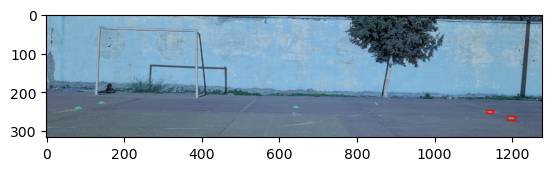

In [63]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches


class YOLOSegmentation:
    def init(self, model_path):
        self.model = YOLO(model_path)
        print(self.model)  # Print the model structure

    def detect(self, img):
        # Display the image
        fig, ax = plt.subplots(1)
        ax.imshow(img)

        # Get img shape
        height, width, channels = img.shape

        results = self.model.predict(source=img.copy(), save=False, save_txt=False)
        print(results)  # Print the raw results

        result = results[0]
        bboxes = []
        for box in result.boxes.xyxy:
            x1, y1, x2, y2 = box
            x_center = (x1 + x2) / 2
            y_center = (y1 + y2) / 2
            width = x2 - x1
            height = y2 - y1
            bbox= get_bounding_box_coordinates ( x_center, y_center, width, height)
            bboxes.append(bbox)


            rect = patches.Rectangle((x1, y1), width, height, linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
        
        plt.show()
        return bboxes
        

# Initialize the YOLOSegmentation class with the YOLOv9 model
seg = YOLOSegmentation()
seg.init('best2.pt')
seg1 = seg.detect(img)

In [60]:
seg1

[[tensor(759168.2500),
  tensor(166112.5469),
  tensor(771711.7500),
  tensor(172762.6094)],
 [tensor(724561.6250),
  tensor(156328.7031),
  tensor(735918.3750),
  tensor(162048.0156)]]